In [1]:
import os
os.chdir("..")
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd

In [2]:
from pints.functionaltests.haario_bardenet_acmc import (test_haario_bardenet_acmc_on_banana,
                                                        test_haario_bardenet_acmc_on_two_dim_gaussian,
                                                        test_haario_bardenet_acmc_on_correlated_gaussian,
                                                        test_haario_bardenet_acmc_on_annulus)

In [3]:
def run_replicates(iterations, n_replicates, test):
    df = pd.DataFrame(columns=['iterations', 'replicate', 'kld', 'ess'],
                      index=np.arange(len(iterations) * n_replicates))
    k = 0
    for it in iterations:
        for rep in range(n_replicates):
            result = test(it)
            df.iloc[k] = {'iterations': it, 'replicate': rep,
                          'kld': result['kld'], 'ess': result['mean-ess']}
            k += 1
    df['iterations'] = pd.to_numeric(df['iterations'])
    df['kld'] = pd.to_numeric(df['kld'])
    df['ess'] = pd.to_numeric(df['ess'])
    return df

Two dimensional Gaussian.

/usr/local/lib/python3.7/site-packages/plotnine/facets/facet.py:552: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


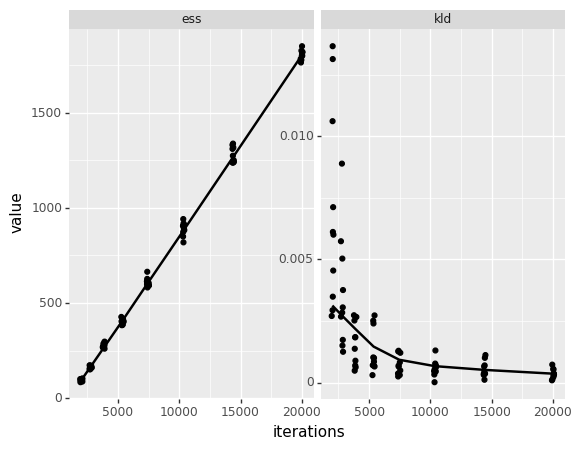

<ggplot: (346625325)>

In [4]:
low = np.log10(2000)
high = np.log10(20000)
test = run_replicates(10**np.linspace(low, high, 8), 10, test_haario_bardenet_acmc_on_two_dim_gaussian)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
(ggplot(df,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))

Correlated Gaussian.

/usr/local/lib/python3.7/site-packages/plotnine/facets/facet.py:552: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


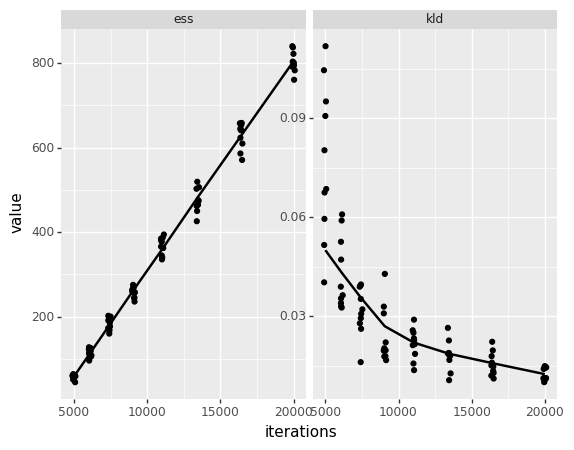

<ggplot: (349504573)>

In [5]:
low = np.log10(5000)
high = np.log10(20000)
test = run_replicates(10**np.linspace(low, high, 8), 10, test_haario_bardenet_acmc_on_correlated_gaussian)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
(ggplot(df,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))

Banana.

/usr/local/lib/python3.7/site-packages/plotnine/facets/facet.py:552: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


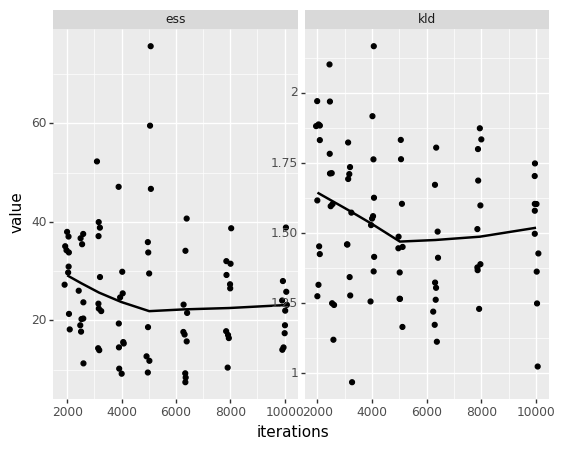

<ggplot: (282371377)>

In [6]:
low = np.log10(2000)
high = np.log10(10000)
test = run_replicates(10**np.linspace(low, high, 8), 10, test_haario_bardenet_acmc_on_banana)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
(ggplot(df,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))

Annulus.

In [7]:
def run_replicates_annulus(iterations, n_replicates, test):
    df = pd.DataFrame(columns=['iterations', 'replicate', 'distance', 'ess'],
                      index=np.arange(len(iterations) * n_replicates))
    k = 0
    for it in iterations:
        for rep in range(n_replicates):
            result = test(it)
            df.iloc[k] = {'iterations': it, 'replicate': rep,
                          'distance': result['distance'], 'ess': result['mean-ess']}
            k += 1
    df['iterations'] = pd.to_numeric(df['iterations'])
    df['distance'] = pd.to_numeric(df['distance'])
    df['ess'] = pd.to_numeric(df['ess'])
    return df

/usr/local/lib/python3.7/site-packages/plotnine/facets/facet.py:552: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


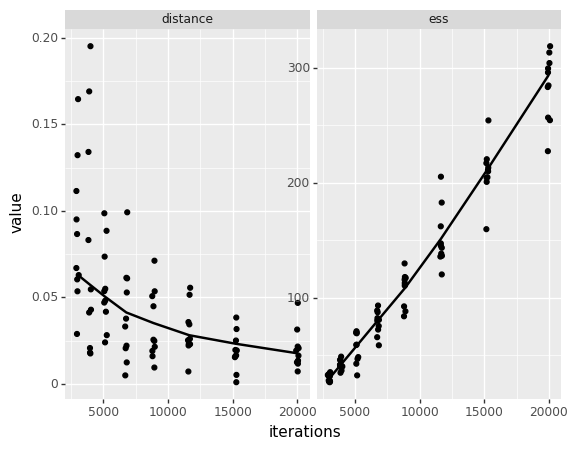

<ggplot: (349376973)>

In [8]:
low = np.log10(3000)
high = np.log10(20000)
test = run_replicates_annulus(10**np.linspace(low, high, 8), 10, test_haario_bardenet_acmc_on_annulus)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
(ggplot(df,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))